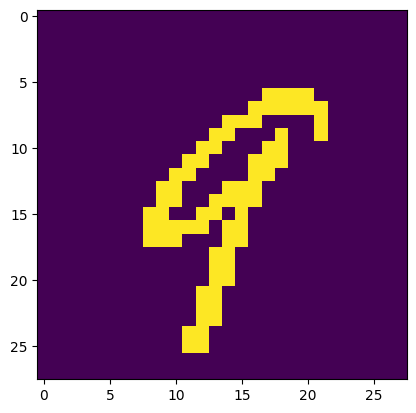

In [1]:
## you need these imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from time import sleep
from IPython import display
import collections

digits = pd.read_csv('digits.csv')

digit_201 = digits.iloc[200]
digit_202 = digits.iloc[201]

digits = digits.drop([200, 201])

THRESHOLD = 128
def set_threshold(pixel):
    if pixel < THRESHOLD:
        return 0
    return 1

pixel_columns = digits.columns[1:]
digits[pixel_columns] = digits[pixel_columns].map(set_threshold)


random_row = digits.iloc[np.random.randint(0, len(digits))]
pixels_random_row_2D = random_row[1:].values.reshape((28, 28))
plt.imshow(pixels_random_row_2D)
plt.show()

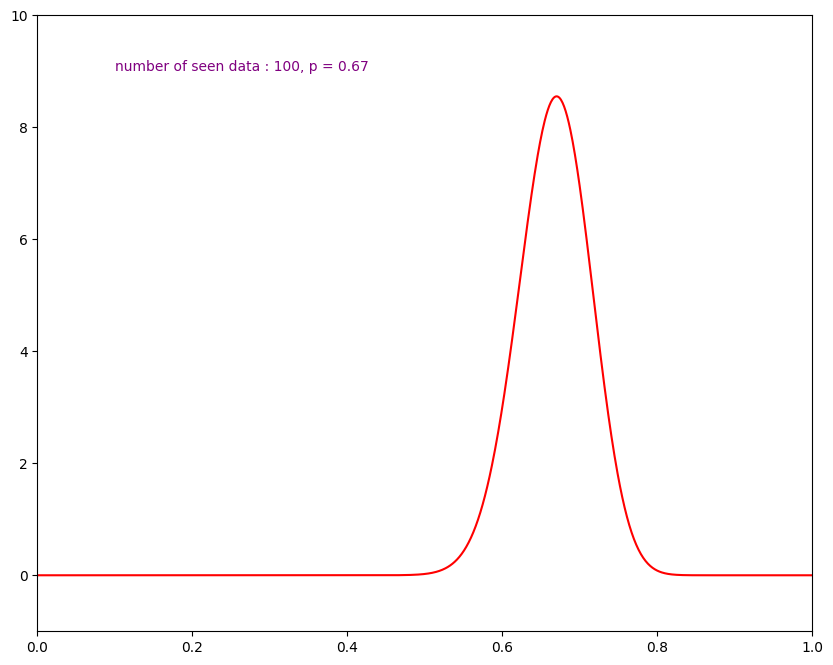

<Figure size 1000x800 with 0 Axes>

In [2]:
t = 1000
p = np.linspace(0,1,t)
fy = stats.beta.pdf(p, a=1, b=1)

def update(fy: np.array, n:bool) -> np.array:
    p = np.linspace(0,1,t)
    # calculate P(N = n| Y = p) which is a bernouli distribution
    pny = p**n*(1-p)**(1-n)

    # calculate integral(0 -> 1) fy * pny
    integral = np.sum(pny * fy) / t

    post = pny * fy / integral
    return post

plt.figure(figsize=(10,8))
for i in range(100):
    # replace 'df' with your dataframe's name, this is just a suggestion, you do not have to code exactly like this
    n =  digits[digits['label'] == 8].iloc[i, digits.columns.get_loc('pixel404')]
    fy = update(fy, n)

    # dynamic plot
    # do not change this part
    plt.plot(p, fy, 'r', label='1')
    plt.ylim(-1, 10)
    plt.xlim(0, 1)
    plt.text(0.1,9,f'number of seen data : {i + 1}, p = {fy.argmax() / t :.2f}', color='purple')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    sleep(0.05)

In [3]:
pX_condLabels = digits.groupby('label').mean().to_numpy()

total_digits = len(digits.index)
labels_prob = {value: count / total_digits for value, count in collections.Counter(digits['label']).items()}
labels_index = {8: 0, 9: 1}

digit_201[pixel_columns] = digit_201[pixel_columns].apply(set_threshold)
digit_202[pixel_columns] = digit_202[pixel_columns].apply(set_threshold)

def calc_pX_condLabel(X_vector, p_vector):
    return np.prod(p_vector**X_vector * (1 - p_vector)**(1 - X_vector))

def calc_pX(pX_condLabels, pLabels):
    return np.sum(pX_condLabels * pLabels)

def calc_pLabel_condX(pX_condLabel, pLabel, pX):
    return pX_condLabel * pLabel / pX

pX201_condLabels = [calc_pX_condLabel(digit_201[pixel_columns].values, pX_condLabels[i]) for i in labels_index.values()]
pX201 = calc_pX(np.array(pX201_condLabels), np.array(list(labels_prob.values())))
pLabel8_condX201 = calc_pLabel_condX(pX201_condLabels[labels_index[8]], labels_prob[8], pX201)
pLabel9_condX201 = calc_pLabel_condX(pX201_condLabels[labels_index[9]], labels_prob[9], pX201)

pX202_condLabels = [calc_pX_condLabel(digit_202[pixel_columns].values, pX_condLabels[i]) for i in labels_index.values()]
pX202 = calc_pX(np.array(pX202_condLabels), np.array(list(labels_prob.values())))
pLabel8_condX202 = calc_pLabel_condX(pX202_condLabels[labels_index[8]], labels_prob[8], pX202)
pLabel9_condX202 = calc_pLabel_condX(pX202_condLabels[labels_index[9]], labels_prob[9], pX202)


print(pLabel8_condX201)
print(pLabel9_condX201)
print(pLabel8_condX202)
print(pLabel9_condX202)

0.9997406457898158
0.00025935421018423725
5.915116612170155e-19
1.0
